In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy

test = pd.read_csv(r"C:\Users\arthu\Downloads\test.csv", sep=';')
train = pd.read_csv(r"C:\Users\arthu\Downloads\train.csv", sep=';')

In [33]:
# Função para calcular a simetria vertical do vetor
def vertical_simmetry(vector):
    vertical = 0
    for i in range(0, 28): 
        for j in range(0, 14):
            vertical += abs(vector[i][j] - vector[i][27-j])
    return vertical/255

# Função para calcular a simetria horizontal do vetor
def horizontal_simmetry(vector):
    horizontal = 0
    for i in range(0, 14): 
        for j in range(0, 28):
            horizontal += abs(vector[i][j] - vector[27-i][j])
    return horizontal/255

# Função para calcular a intensidade do vetor
def intensity(vector):
    return np.sum(vector)/255


In [34]:
# Transformando os dados em numpy array
train_np = train.to_numpy()
test_np = test.to_numpy()

In [35]:
#Cria um dataframe com as colunas label, vertical, horizontal e intensity
train_redu = pd.DataFrame(columns=['label', 'vertical', 'horizontal', 'intensity'])
test_redu = pd.DataFrame(columns=['label', 'vertical', 'horizontal', 'intensity'])

In [36]:
train_redu['label'] = train['label']
test_redu['label'] = test['label']

In [37]:
#Atribui os valores de simetria vertical, horizontal e intensidade para cada vetor
train_redu['vertical'] = [vertical_simmetry(train_np[i][1:].reshape(28,28)) for i in range(0, len(train_np))]

train_redu['horizontal'] = [horizontal_simmetry(train_np[i][1:].reshape(28,28)) for i in range(0, len(train_np))]

train_redu['intensity'] = [intensity(train_np[i][1:].reshape(28,28)) for i in range(0, len(train_np))]


In [38]:

test_redu['vertical'] = [vertical_simmetry(test_np[i][1:].reshape(28,28)) for i in range(0, len(test_np))]

test_redu['horizontal'] = [horizontal_simmetry(test_np[i][1:].reshape(28,28)) for i in range(0, len(test_np))]

test_redu['intensity'] = [intensity(test_np[i][1:].reshape(28,28)) for i in range(0, len(test_np))]


In [39]:
# Somando as simetrias vertical e horizontal para obter a simetria total
train_redu['simmetry'] = train_redu['vertical'] + train_redu['horizontal'] 
test_redu['simmetry'] = test_redu['vertical'] + test_redu['horizontal'] 

In [40]:
# Separando os dados em 1 e 5
train1x5 = train_redu[(train_redu['label'] == 1) | (train_redu['label'] == 5)]
test1x5 = test_redu[(test_redu['label'] == 1) | (test_redu['label'] == 5)]

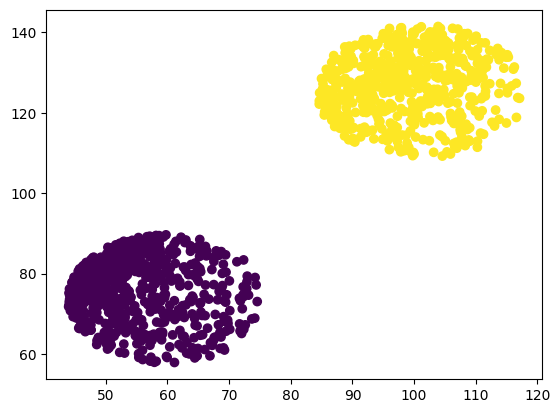

In [41]:
# plotando os dados
plt.scatter(train1x5['intensity'], train1x5['simmetry'], c=train1x5['label'])
plt.show()

In [42]:
# Separando os dados de treino e teste
Features = ['intensity', 'simmetry']

X_train = train1x5[Features].values
y_train = train1x5.label.values

X_test = test1x5[Features].values
y_test = test1x5.label.values

In [43]:
X_train

array([[ 44.70196078,  69.27058824],
       [ 59.85098039,  83.44313725],
       [ 48.55294118,  79.04313725],
       ...,
       [110.7254902 , 133.01960784],
       [ 99.30588235, 132.13333333],
       [101.17254902, 141.36470588]])

In [44]:
#reduz as casas decimais para 2
X_train = np.around(X_train, decimals=2)
X_test = np.around(X_test, decimals=2)

In [45]:
X_train

array([[ 44.7 ,  69.27],
       [ 59.85,  83.44],
       [ 48.55,  79.04],
       ...,
       [110.73, 133.02],
       [ 99.31, 132.13],
       [101.17, 141.36]])

In [46]:
y_train = np.where(y_train == 1, 1, -1) #1 = 1, 5 = -1
y_test = np.where(y_test == 1, 1, -1) 

### Perceptron

In [47]:
class Perceptron:
    def __init__(self, eta, tmax):
        self.eta = eta
        self.tmax = tmax
    
    def fit(self, X, y):

        w = np.zeros(X.shape[1]) # inicializa os pesos com 0
        b = 1 # inicializa o bias com 1
        y_pred = []
        for i in range(self.tmax):
    
            for j in range(X.shape[0]):

                z = (np.dot(X[j], w) + b) # produto escalar entre os pesos e as entradas + bias
                y_pred = 1 if z > 0 else -1 # se o produto escalar for maior que 0, então a predição é 1, caso contrário, a predição é -1
                
                # Atualização dos pesos se a predição for incorreta
                if y_pred != y[j]:
                    w += self.eta * np.dot(y[j],X[j]) #eta serve para controlar a velocidade de aprendizado, ou seja, o quanto os pesos serão atualizados
                    b += self.eta * y[j] 
                    
        return w, b
    
    def predict(self, X, w, b):
        y_pred = []
        for i in range(X.shape[0]):
            if (np.dot(X[i],w) + b) > 0: # todas as entradas com resultado positivo pertencem à classe 1
                y_pred.append(1)  
            else:
                y_pred.append(-1)
                
        return y_pred
    

if __name__== "__main__":
  
  pct = Perceptron(0.0001, 2)
  w,b = pct.fit(X_train, y_train)
  y_pred = pct.predict(X_test, w, b) 

  print(f"\n--------------------- PERCEPTRON ---------------------")

  # Relatório de eficácia
  print(f"\nRelatório de Eficácia: \n")
  print(classification_report(y_test, y_pred))


--------------------- PERCEPTRON ---------------------

Relatório de Eficácia: 

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



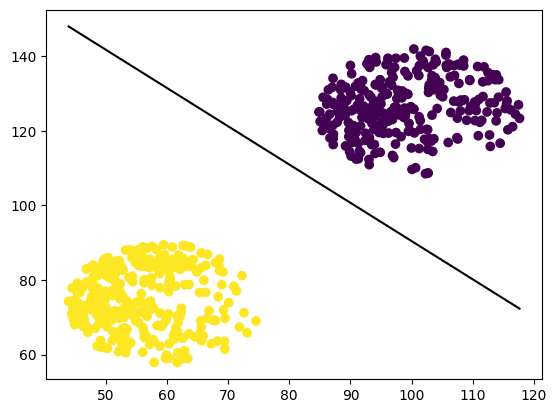

In [48]:
#plot do gráfico com o peso e o bias separando os dados
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.plot([min(X_test[:,0]), max(X_test[:,0])], [(-w[0]/w[1])*x + (-b/w[1]) for x in [min(X_test[:,0]), max(X_test[:,0])]], '-k')
plt.show()

### Classificador completo


#### Estratégia “um contra todos”. Nessa estratégia, inicialmente, escolhe-se o dígito 0 para ser a classe 𝑦 = +1 e todos os outros dígitos (1, 4 e 5), temporariamente, definidos como a classe 𝑦 = −1

In [49]:
X_train = train_redu[Features].values
y_train = train_redu.label.values

X_test = test_redu[Features].values
y_test = test_redu.label.values

In [50]:
#reduz as casas decimais para 2
X_train = np.around(X_train, decimals=2)
X_test = np.around(X_test, decimals=2)

In [51]:
y_test

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [64]:

if __name__== "__main__":
    
  
    eta = 0.0001
    tmax = 20000
    # Treina um classificador para o dígito 0 e os demais dígitos
    y_train_0 = np.where(y_train == 0, 1, -1) #0 = 1, resto = -1
    y_test_0 = np.where(y_test == 0, 1, -1) #0 = 1, resto = -1
    pct0 = Perceptron(eta, tmax)
    w0, b0 = pct0.fit(X_train, y_train_0)
    y_pred_0 = pct0.predict(X_test, w0, b0)



    # Relatório de eficácia
    print(f"\nRelatório de Eficácia: \n")
    print(classification_report(y_test_0, y_pred_0))



Relatório de Eficácia: 

              precision    recall  f1-score   support

          -1       0.89      1.00      0.94       897
           1       1.00      0.47      0.64       218

    accuracy                           0.90      1115
   macro avg       0.94      0.74      0.79      1115
weighted avg       0.91      0.90      0.88      1115



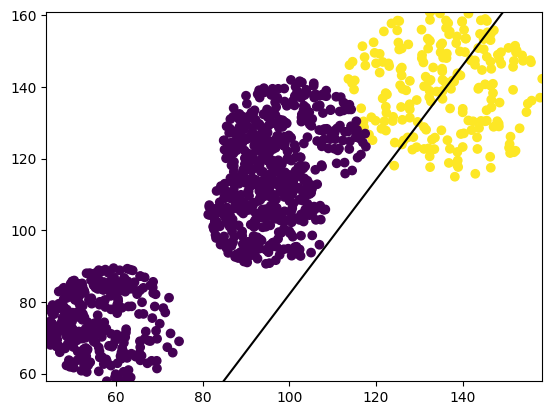

In [65]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_0)
plt.plot([min(X_test[:,0]), max(X_test[:,0])], [(-w0[0]/w0[1])*x + (-b0/w0[1]) for x in [min(X_test[:,0]), max(X_test[:,0])]], '-k')
plt.xlim(min(X_test[:,0]), max(X_test[:,0]))
plt.ylim(min(X_test[:,1]), max(X_test[:,1]))
plt.show()

In [54]:
if __name__== "__main__":
  
    eta = 0.000001
    tmax = 2000
    #Remove o dígito 0
    X_train_1 = np.delete(X_train, np.where(y_train == 0), axis=0)
    y_train_1 = np.delete(y_train, np.where(y_train == 0), axis=0)

    X_test_1 = np.delete(X_test, np.where(y_test == 0), axis=0)
    y_test_1 = np.delete(y_test, np.where(y_test == 0), axis=0)

    # Treina um classificador para o dígito 1 e os demais dígitos
    y_train_1 = np.where(y_train_1 == 1, 1, -1)# 1 = 1, resto = -1
    y_test_1 = np.where(y_test_1 == 1, 1, -1)# 1 = 1, resto = -1
    pct1 = Perceptron(eta, tmax)
    w1, b1 = pct1.fit(X_train_1, y_train_1)
    y_pred_1 = pct1.predict(X_test_1, w1, b1)

     # Relatório de eficácia
    print(f"\nRelatório de Eficácia: \n")
    print(classification_report(y_test_1, y_pred_1))


Relatório de Eficácia: 

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       605
           1       1.00      1.00      1.00       292

    accuracy                           1.00       897
   macro avg       1.00      1.00      1.00       897
weighted avg       1.00      1.00      1.00       897



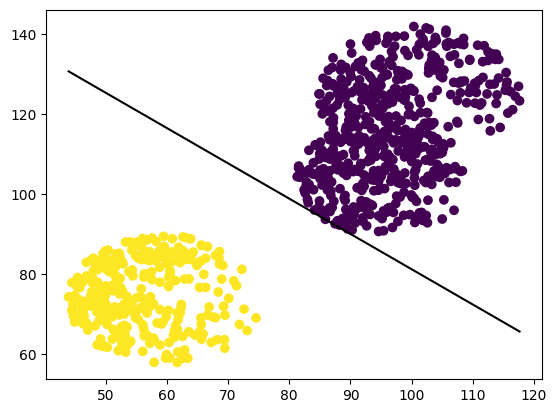

In [55]:
plt.scatter(X_test_1[:,0], X_test_1[:,1], c=y_test_1)
plt.plot([min(X_test_1[:,0]), max(X_test_1[:,0])], [(-w1[0]/w1[1])*x + (-b1/w1[1]) for x in [min(X_test_1[:,0]), max(X_test_1[:,0])]], '-k')
plt.show()

In [56]:
if __name__== "__main__":
  
    eta = 0.0000001
    tmax = 2000

    #Remove o dígito 0
    X_train_4 = np.delete(X_train, np.where(y_train == 0), axis=0)
    y_train_4 = np.delete(y_train, np.where(y_train == 0), axis=0)

    X_test_4 = np.delete(X_test, np.where(y_test == 0), axis=0)
    y_test_4 = np.delete(y_test, np.where(y_test == 0), axis=0)

    #Remove o dígito 1
    X_train_4 = np.delete(X_train_4, np.where(y_train_4 == 1), axis=0)
    y_train_4 = np.delete(y_train_4, np.where(y_train_4 == 1), axis=0)

    X_test_4 = np.delete(X_test_4, np.where(y_test_4 == 1), axis=0)
    y_test_4 = np.delete(y_test_4, np.where(y_test_4 == 1), axis=0)

    # Treina um classificador para o dígito 4 e os demais dígitos
    y_train_4 = np.where(y_train_4 == 4, 1, -1) # 4 = 1, resto = -1
    y_test_4 = np.where(y_test_4 == 4, 1, -1) # 4 = 1, resto = -1
    pct4 = Perceptron(eta, tmax)
    w4, b4 = pct4.fit(X_train_4, y_train_4)
    y_pred_4 = pct4.predict(X_test_4, w4, b4)


     # Relatório de eficácia
    print(f"\nRelatório de Eficácia: \n")
    print(classification_report(y_test_4, y_pred_4))


Relatório de Eficácia: 

              precision    recall  f1-score   support

          -1       0.79      0.98      0.88       291
           1       0.98      0.76      0.85       314

    accuracy                           0.87       605
   macro avg       0.88      0.87      0.87       605
weighted avg       0.89      0.87      0.86       605



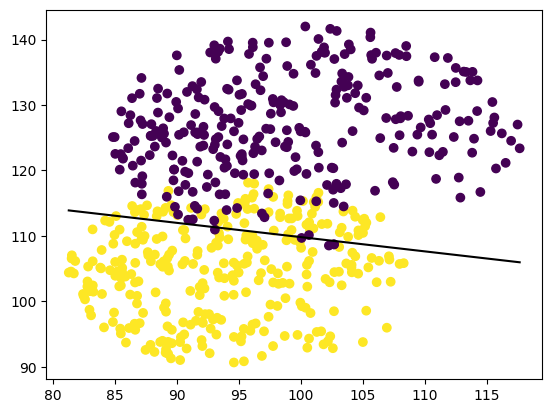

In [57]:
plt.scatter(X_test_4[:,0], X_test_4[:,1], c=y_test_4)
plt.plot([min(X_test_4[:,0]), max(X_test_4[:,0])], [(-w4[0]/w4[1])*x + (-b4/w4[1]) for x in [min(X_test_4[:,0]), max(X_test_4[:,0])]], '-k')
plt.show()

In [68]:
if __name__== "__main__":

    # Classificação final
    y_pred = []

    for i in range(len(X_test)):
        x_test = X_test[i]
        if np.dot(w0, x_test) + b0 > 0:  # Ponto pertence ao dígito 0
            y_pred.append(0)
        elif np.dot(w1, x_test) + b1 > 0:  # Ponto pertence ao dígito 1
            y_pred.append(1)
        elif np.dot(w4, x_test) + b4 > 0 :  # Ponto pertence ao dígito 4
            y_pred.append(4)
        else:
            y_pred.append(5)
       


    # Relatório de eficácia
    print(f"\nRelatório de Eficácia: \n")
    print(classification_report(y_test, y_pred, zero_division=1))
    


Relatório de Eficácia: 

              precision    recall  f1-score   support

           0       1.00      0.47      0.64       218
           1       1.00      1.00      1.00       292
           4       0.98      0.76      0.85       314
           5       0.60      0.98      0.74       291

    accuracy                           0.82      1115
   macro avg       0.89      0.80      0.81      1115
weighted avg       0.89      0.82      0.82      1115



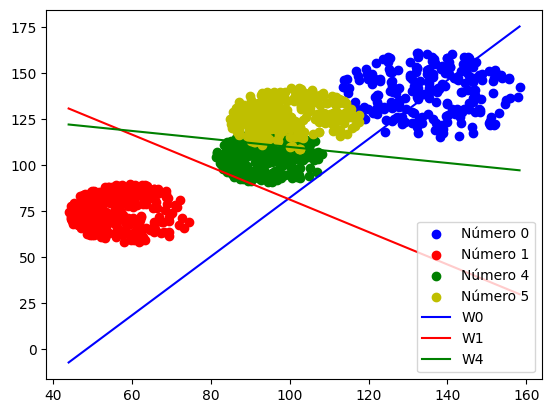

In [67]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='b', label='Número 0')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='r', label='Número 1')
plt.scatter(X_test[y_test==4, 0], X_test[y_test==4, 1], c='g', label='Número 4')
plt.scatter(X_test[y_test==5, 0], X_test[y_test==5, 1], c='y', label='Número 5')
plt.plot([min(X_test[:,0]), max(X_test[:,0])], [(-w0[0]/w0[1])*x + (-b0/w0[1]) for x in [min(X_test[:,0]), max(X_test[:,0])]], '-b', label='W0')
plt.plot([min(X_test[:,0]), max(X_test[:,0])], [(-w1[0]/w1[1])*x + (-b1/w1[1]) for x in [min(X_test[:,0]), max(X_test[:,0])]], '-r', label='W1')
plt.plot([min(X_test[:,0]), max(X_test[:,0])], [(-w4[0]/w4[1])*x + (-b4/w4[1]) for x in [min(X_test[:,0]), max(X_test[:,0])]], '-g', label='W4')
plt.legend()
plt.show()

### Regressão Logística

In [60]:
class LogisticRegression:
    
    def __init__(self, lr, epochs, reg_lambda):
        self.lr = lr
        self.epochs = epochs
        self.reg_lambda = reg_lambda
        
    def _sigmoid(self, x):
        return scipy.special.expit(x) # 1 / (1 + np.exp(-x))
    
    def _add_intercept(self, X):
        return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1) # adiciona o bias 
    
    def fit(self, X, y):
        
        # normaliza os dados
        X = X / np.max(X, axis=0)
        
        X = self._add_intercept(X)
        self.weights = np.zeros(X.shape[1])
        self.cost_history = []
        
        for epoch in range(self.epochs):
            
            z = np.dot(X, self.weights)
            h = self._sigmoid(z)
            
            error = h - y
            
            # weight decay
            L2_reg = self.reg_lambda * np.sum(self.weights ** 2) + 1e-8
            
            grad = np.dot(X.T, error) + L2_reg
            
            self.weights -= self.lr * grad
            
            # Função de custo
            cost = (-y * np.log(h + 1e-8) - (1 - y) * np.log(1 - h + 1e-8)).mean() + (self.reg_lambda / (2 * len(y))) * np.sum(self.weights ** 2) + 1e-8
            
            self.cost_history.append(cost)
        
        return self.weights
    
    def predict(self, X):
        
        # normaliza os dados
        X = X / np.max(X, axis=0)
        
        X = self._add_intercept(X)
        z = np.dot(X, self.weights)
        h = self._sigmoid(z)
        
        return np.round(h) # retorna 0 ou 1
        

if __name__ == "__main__":
    
    # Define a classe labels para a estratégia one-vs-all
    labels = np.unique(y_train) # [0, 1, 4, 5]
    
    # Treina um classificador para cada classe e armazena os resultados
    accuracies = []
    classifiers = []
    
    for label in labels:
        
        # Define y_train e y_test para o classificador
        y_train_one_vs_all = np.where(y_train == label, 1, 0) # 1 if label, 0 otherwise
        y_test_one_vs_all = np.where(y_test == label, 1, 0) # 1 if label, 0 otherwise
        
        # Treina o classificador
        clf = LogisticRegression(lr=0.001, epochs=20000, reg_lambda=0.0001) # se apresentar overfitting, aumentar o reg_lambda
        clf.fit(X_train, y_train_one_vs_all)
        
        # Preve os dados de teste
        y_pred = clf.predict(X_test)
        accuracy = np.mean(y_pred == y_test_one_vs_all)
        
        accuracies.append(accuracy)
        classifiers.append(clf)
        
        print(f"Acurácia da classe {label}: {accuracy}")



Acurácia da classe 0: 0.9973094170403587
Acurácia da classe 1: 1.0
Acurácia da classe 4: 0.6977578475336322
Acurácia da classe 5: 0.8493273542600897


Região de decisão 0:


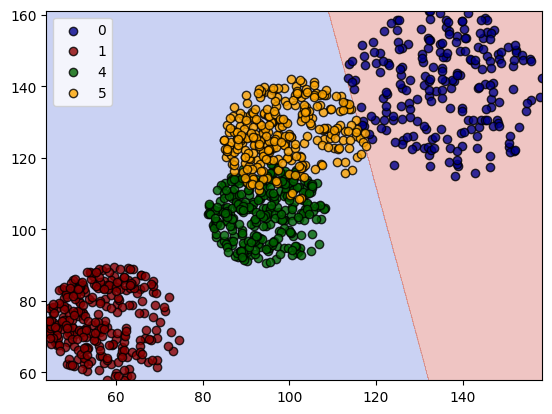

Região de decisão 1:


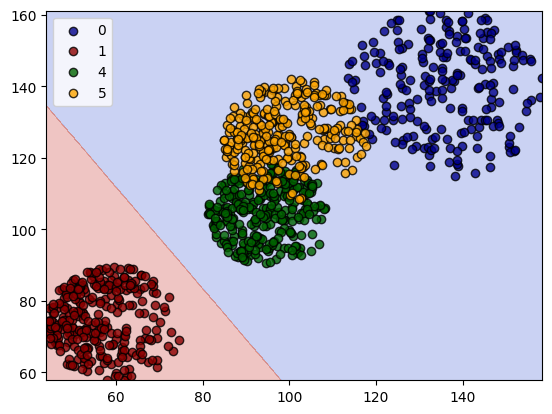

Região de decisão 4:


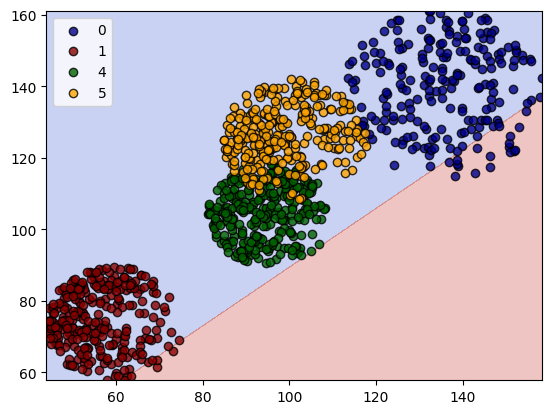

Região de decisão 5:


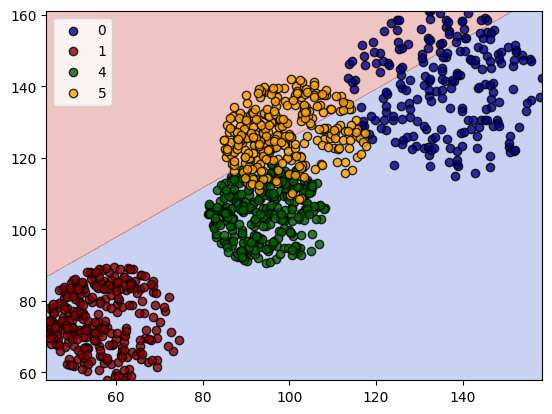

In [61]:
def plot_decision_regions(X, y, model, labels):
    # Cria um grid de valores de entrada
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max,1000),
                           np.linspace(x2_min, x2_max,1000))
    
    # Obtém as previsões do modelo para o grid de valores de entrada
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    Z = Z.reshape(xx1.shape)
    
    # Plota o resultado usando uma função de contorno
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plota os pontos de treinamento
    for i, label in enumerate(labels):
        plt.scatter(X[y == label, 0], X[y == label, 1],
                    alpha=0.8, c='darkred' if label == 1 else 'darkblue' if label == 0 else 'darkgreen' if label == 4 else 'orange',
                    edgecolor='black', label=label)

    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    plt.show()

# Plota as regiões de decisão para cada classificador
for i, label in enumerate(labels):
    print(f"Região de decisão {label}:")
    plot_decision_regions(X_test, y_test, classifiers[i], labels)

### Regressão Linear

In [62]:
class LinearRegression:
    
    def __init__(self, lr, epochs, reg_lambda):
        self.lr = lr
        self.epochs = epochs
        self.reg_lambda = reg_lambda
        
    def _add_intercept(self, X):
        return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    
    def fit(self, X, y):
        # normaliza os dados
        X = X / np.max(X, axis=0)
        
        X = self._add_intercept(X)
        self.weights = np.zeros(X.shape[1])
        self.cost_history = []
        
        for epoch in range(self.epochs):
            
            z = np.dot(X, self.weights)
            h = z
            
            error = h - y # erro residual 
            
            # weight decay
            L2_reg = self.reg_lambda * np.sum(self.weights ** 2) + 1e-8
            
            grad = np.dot(X.T, error) + L2_reg # gradiente da função de custo com regularização L2
            
            self.weights -= self.lr * grad # atualiza os pesos
            
            # Função de custo
            cost = np.sum(error ** 2) / (2 * len(y)) + (self.reg_lambda / (2 * len(y))) * np.sum(self.weights ** 2) + 1e-8
            
            self.cost_history.append(cost) # armazena o custo para cada época
        
        return self.weights
    
    def predict(self, X):
        
        # normaliza os dados
        X = X / np.max(X, axis=0)
        
        X = self._add_intercept(X)
        z = np.dot(X, self.weights)
        
        return np.round(z)
        

if __name__ == "__main__":
    
    # Define a classe labels para a estratégia one-vs-all
    labels = np.unique(y_train) # [0, 1, 4, 5]
    
    # Treina um classificador para cada classe e armazena os resultados
    accuracies = []
    classifiers = []
    
    for label in labels:
        
        # Define y_train e y_test para o classificador
        y_train_one_vs_all = np.where(y_train == label, 1, 0) # 1 if label, 0 otherwise
        y_test_one_vs_all = np.where(y_test == label, 1, 0) # 1 if label, 0 otherwise
        
        # Treina o classificador
        clf = LinearRegression(lr=0.0001, epochs=20000, reg_lambda=0.001) # se apresentar overfitting, aumentar o reg_lambda
        clf.fit(X_train, y_train_one_vs_all)
        
        # Preve os dados de teste
        y_pred = clf.predict(X_test)
        accuracy = np.mean(y_pred == y_test_one_vs_all)
        
        accuracies.append(accuracy)
        classifiers.append(clf)
        
        print(f"Acurácia da classe {label}: {accuracy}")

Acurácia da classe 0: 0.9632286995515695
Acurácia da classe 1: 1.0
Acurácia da classe 4: 0.7076233183856502
Acurácia da classe 5: 0.8376681614349776


Região de decisão 0:


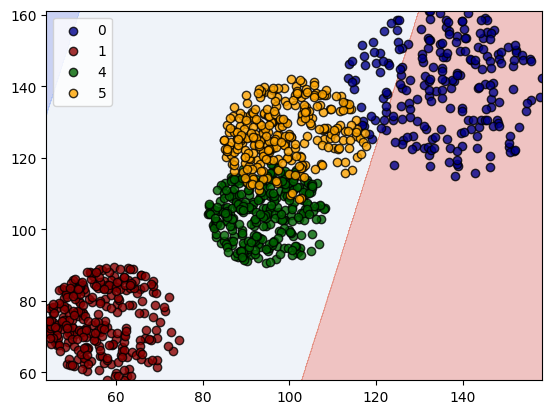

Região de decisão 1:


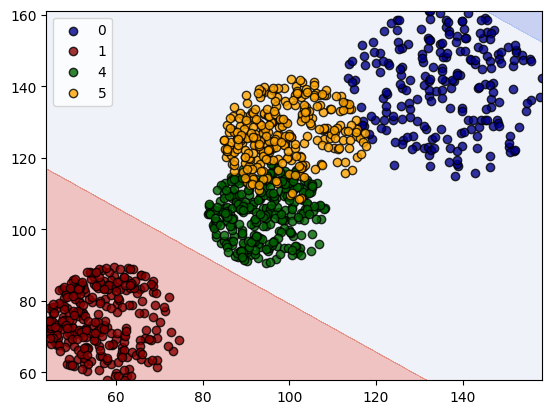

Região de decisão 4:


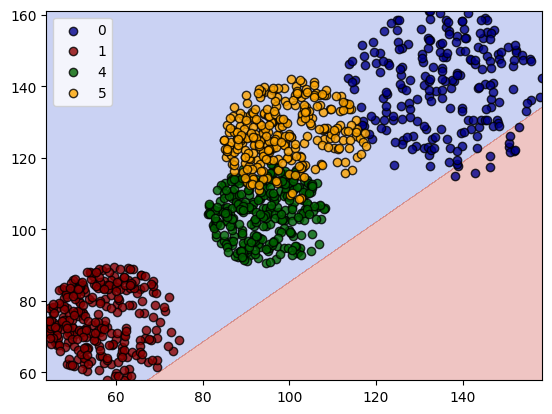

Região de decisão 5:


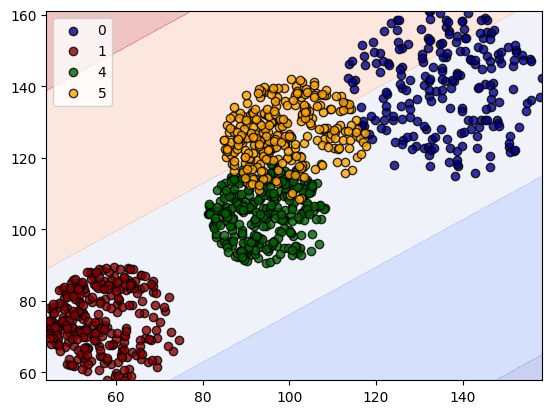

In [63]:
for i, label in enumerate(labels):
    print(f"Região de decisão {label}:")
    plot_decision_regions(X_test, y_test, classifiers[i], labels)